In [2]:
from PIL import Image, ImageDraw, ImageSequence
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob as glob
import os
import pandas as pd
from skimage import io, filters, morphology
import cv2
from scipy import ndimage as ndi
%matplotlib inline
#os.chdir('/Users/phoebewhite/Library/CloudStorage/GoogleDrive-phwhite@sas.upenn.edu/.shortcut-targets-by-id/1zSqx3IzXMwt6clUjwyqmlOf4G1K53lvy/Fasse_Shared/AJF_Drive_copy/Experiments/AJF009/2022_01_14_analysis_scripts/2022_05_27_analysis/NGFR_imaging/')
os.chdir('/Volumes/GoogleDrive/My Drive/Fasse_Shared/AJF_Drive_copy/Experiments/AJF009/2022_01_14_analysis_scripts/2022_05_27_analysis/NGFR_imaging/')

inputing and getting median of only the GFP channel of blank images

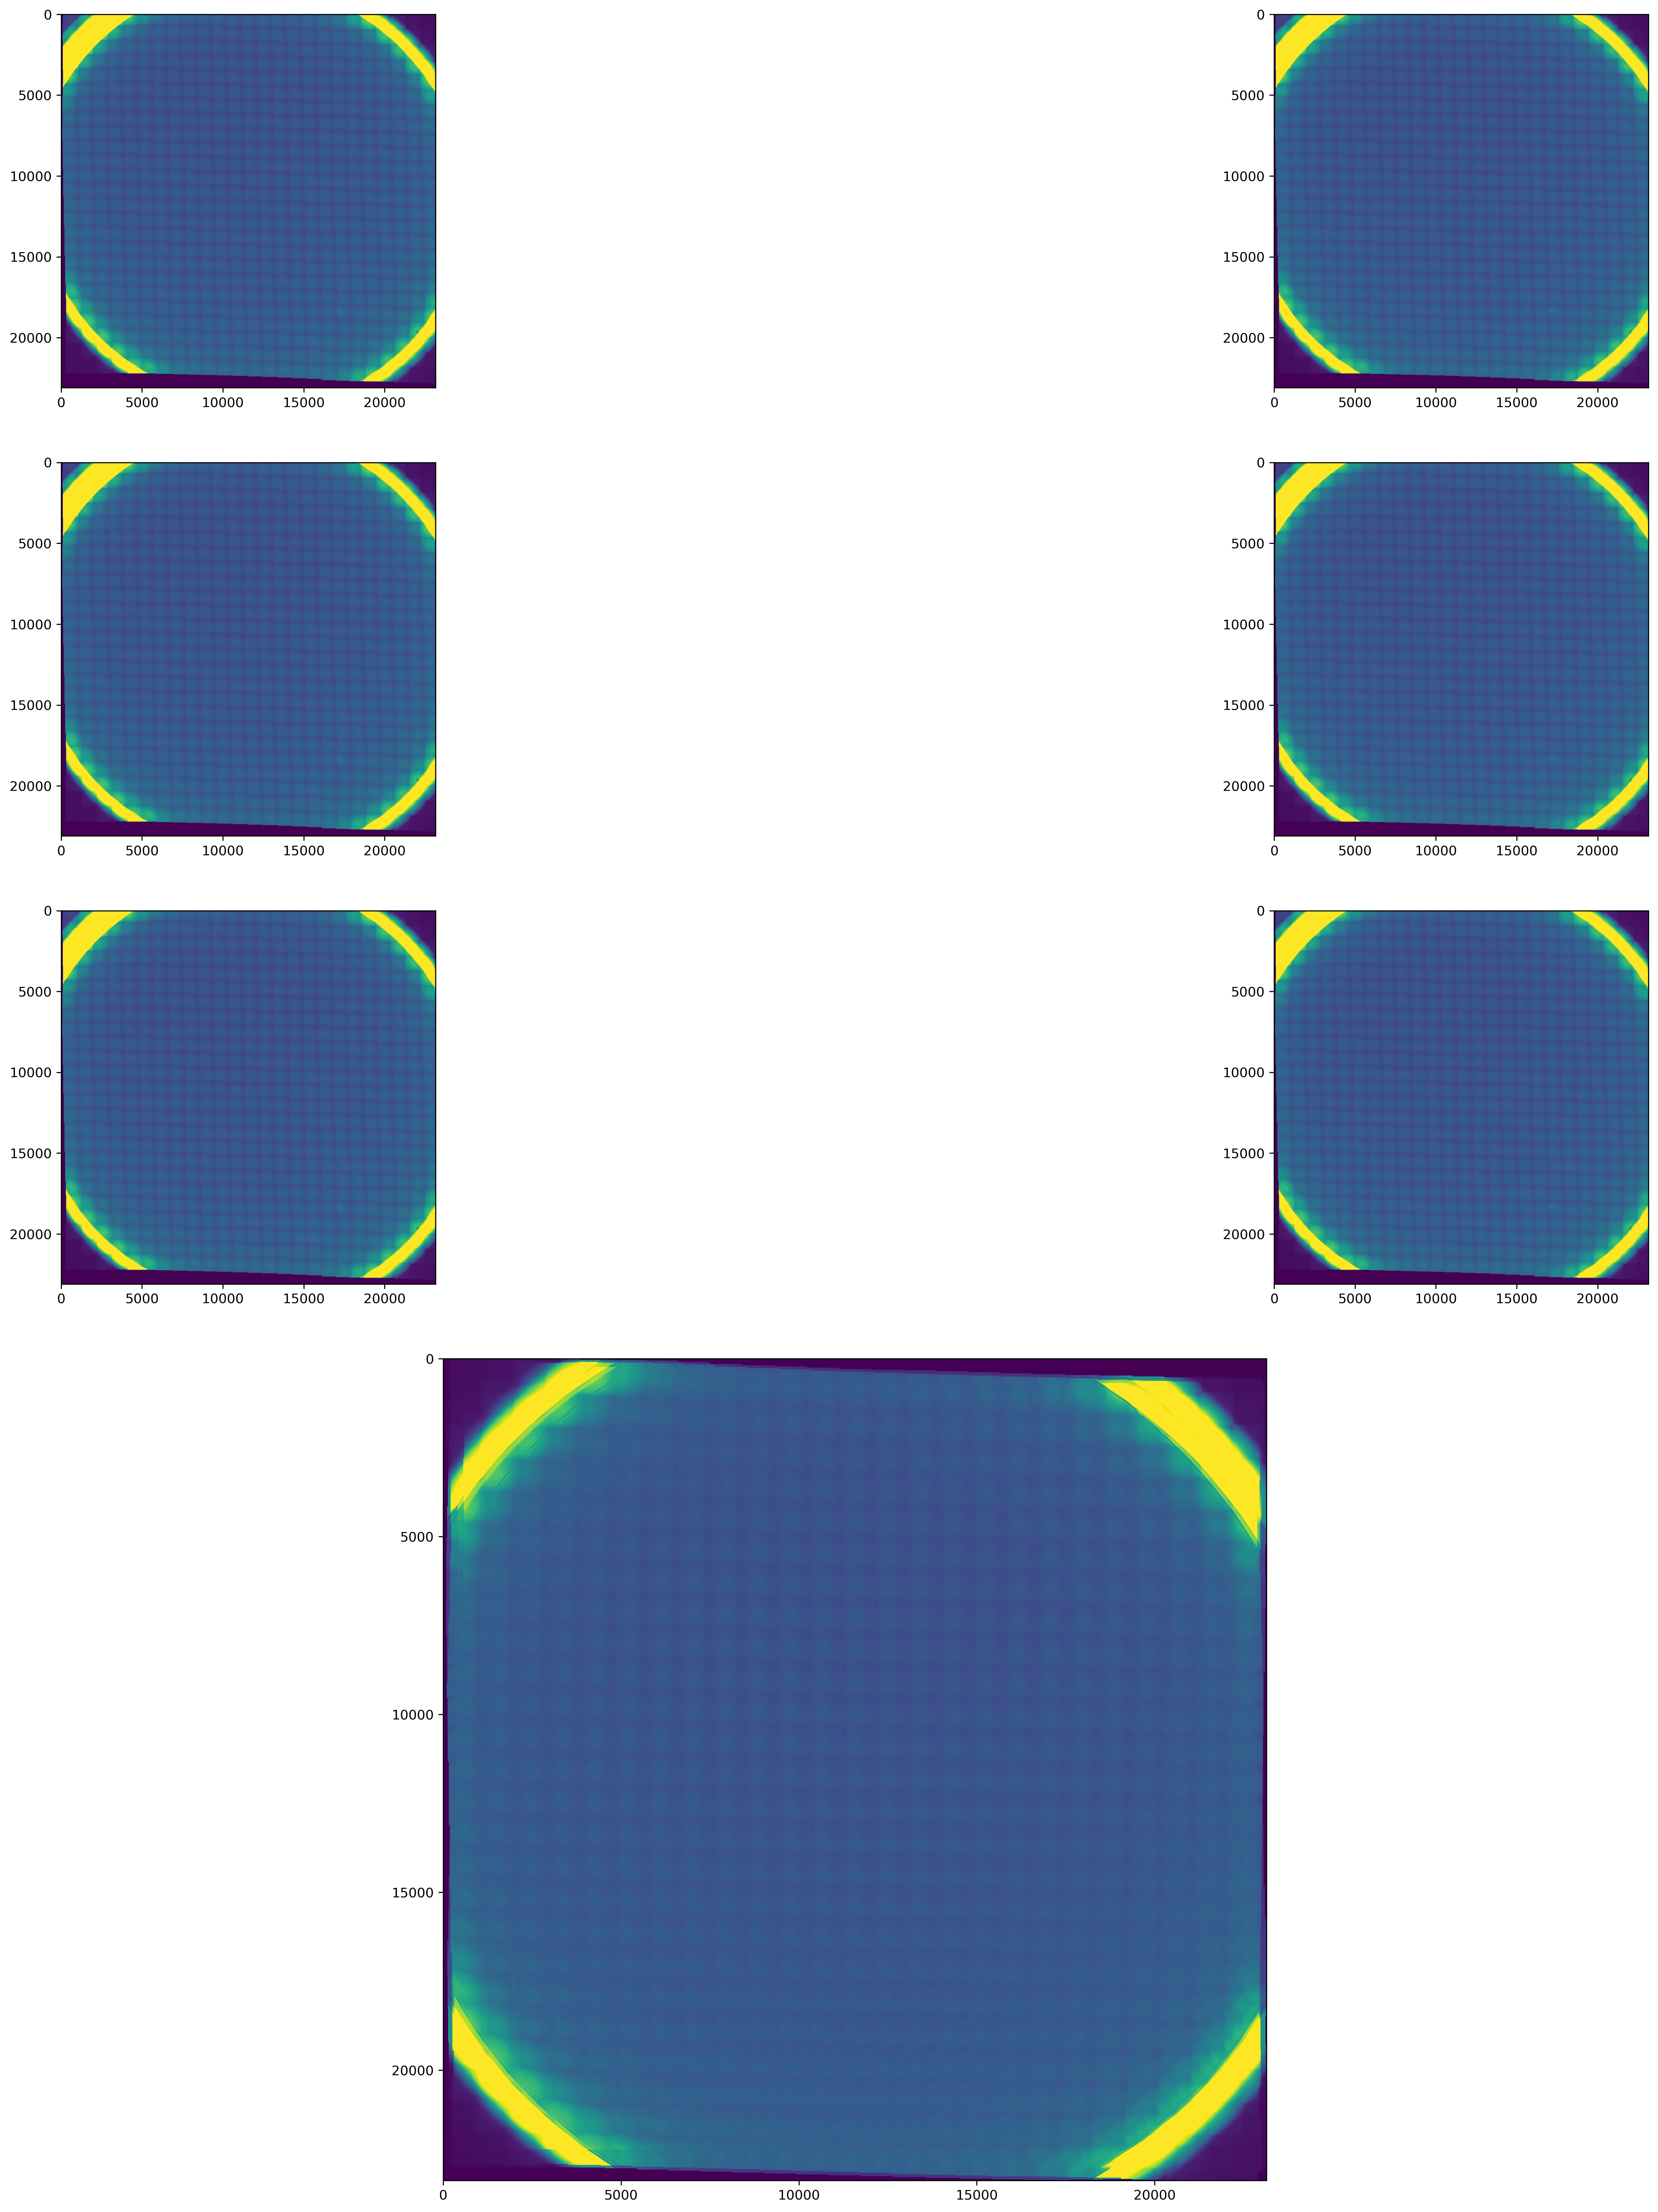

In [3]:
Image.MAX_IMAGE_PIXELS = None

#blank_files = glob.glob('/Users/phoebewhite/Library/CloudStorage/GoogleDrive-phwhite@sas.upenn.edu/.shortcut-targets-by-id/12tKUWWdMW6Is2j_X0QWarfY8tIR_UEj9/White_Shared/cloud/experiment_ids/pw011/converted/2023_01_10_blank/Plate2023_01_10_pw011_blank_Well1_ChannelDAPI,GFP_Seq0000.tif')
#blank_files = glob.glob('/Users/phoebewhite/Library/CloudStorage/GoogleDrive-phwhite@sas.upenn.edu/.shortcut-targets-by-id/12tKUWWdMW6Is2j_X0QWarfY8tIR_UEj9/White_Shared/cloud/experiment_ids/pw011/converted/2023_01_10_blank/*.tif')
blank_files = glob.glob('/Volumes/GoogleDrive/My Drive/White_Shared/cloud/experiment_ids/pw011/converted/2023_01_10_blank/*.tif')

blank_arrays = list()
for j in blank_files:
    im = Image.open(j)
    for i, page in enumerate(ImageSequence.Iterator(im)):
        if i == 1:
            blank_arrays.append(np.asarray(page))
       



fig = plt.figure(figsize=(30, 30), dpi=300)
for k in range(0,len(blank_arrays)):
    ax = fig.add_subplot(5, 2, k+1)
    imgplot = plt.imshow(page)
    
blank_ave = np.median(blank_arrays, axis=0)
ax = fig.add_subplot(5, 2, (7,10))
imgplot = plt.imshow(blank_ave)


organizing images by well number

In [4]:
# Group paths to different wells
#test = glob.glob('/Users/phoebewhite/Library/CloudStorage/GoogleDrive-phwhite@sas.upenn.edu/.shortcut-targets-by-id/12tKUWWdMW6Is2j_X0QWarfY8tIR_UEj9/White_Shared/cloud/experiment_ids/pw011/converted/*/*.tif')
test = glob.glob('/Volumes/GoogleDrive/My Drive/White_Shared/cloud/experiment_ids/pw011/converted/*/*.tif')

well_paths = list()
for i in range(1,7):
    found = []
    print(i)
    for name in test:
        if ('Well' + str(i)) in name and 'blank' not in name:
           found.append(name)
    print(found)
    well_paths.append(found)



1
['/Volumes/GoogleDrive/My Drive/White_Shared/cloud/experiment_ids/pw011/converted/2022_12_12/Plate2022_12_12_pw011_Well1_ChannelDAPI,GFP_Seq0000.tif', '/Volumes/GoogleDrive/My Drive/White_Shared/cloud/experiment_ids/pw011/converted/2022_12_05/Plate2022_12_05_PW011_10x_Well1_ChannelDAPI,GFP_Seq0000.tif', '/Volumes/GoogleDrive/My Drive/White_Shared/cloud/experiment_ids/pw011/converted/2022_11_28/Plate2022_11_28_PW011_Well1_ChannelDAPI,GFP_Seq0000.tif', '/Volumes/GoogleDrive/My Drive/White_Shared/cloud/experiment_ids/pw011/converted/2022_11_21/Plate2022_11_21_Well1_10x_Well1_ChannelDAPI,GFP_Seq0000.tif', '/Volumes/GoogleDrive/My Drive/White_Shared/cloud/experiment_ids/pw011/converted/2022_11_17/Plate2022_11_17_Well1_10x_Well1_ChannelDAPI,GFP_Seq0000.tif']
2
['/Volumes/GoogleDrive/My Drive/White_Shared/cloud/experiment_ids/pw011/converted/2022_12_12/Plate2022_12_12_pw011_Well2_ChannelDAPI,GFP_Seq0000.tif', '/Volumes/GoogleDrive/My Drive/White_Shared/cloud/experiment_ids/pw011/converted/2

In [ ]:
#for i in well paths glob.glob ...
#step by step and save multiple outputs
#parent folder
    #well1
        #divided
        #reload dividid --> threshold

In [ ]:

for i in range(1,len(well_paths)+1):

    if not os.path.exists('Well'+str(i)):
        os.mkdir('Well'+str(i))
    if not os.path.exists('Well'+str(i)+'/divided'):
        os.mkdir('Well'+str(i)+'/divided')

    for file in well_paths[i-1]:
        imname = file.split('/')[-1][:-16]
        print(imname)

        im = Image.open(file)
        for i, page in enumerate(ImageSequence.Iterator(im)):
            if i == 1:
                fig = plt.figure(figsize=(30, 30), dpi=300)
                ax = fig.add_subplot(1, 2, 1)
                image = np.asarray(page)
                imgplot = plt.imshow(image)

        [h,w] = blank_ave.shape

        div_im = image/(blank_ave+1)
        div_im = div_im[2000:(h-2000),2000:(w-2000)]
        ax = fig.add_subplot(1, 2, 2)
        imgplot = plt.imshow(div_im)

        plt.imsave('Well' + str(i) + '/divided/' + imname + '.tiff', div_im)




Plate2022_12_12_pw011_Well1_ChannelDAPI
Plate2022_12_05_PW011_10x_Well1_ChannelDAPI
Plate2022_11_28_PW011_Well1_ChannelDAPI
Plate2022_11_21_Well1_10x_Well1_ChannelDAPI
Plate2022_11_17_Well1_10x_Well1_ChannelDAPI
Plate2022_12_12_pw011_Well2_ChannelDAPI
Plate2022_12_05_PW011_10x_Well2_ChannelDAPI
Plate2022_11_28_PW011_Well2_ChannelDAPI
Plate2022_11_21_Well2_10x_Well2_ChannelDAPI
Plate2022_11_17_Well2_10x_Well2_ChannelDAPI
Plate2022_12_12_pw011_Well3_ChannelDAPI
Plate2022_12_05_PW011_10x_Well3_ChannelDAPI
Plate2022_11_28_PW011_Well3_ChannelDAPI
Plate2022_11_21_Well3_10x_Well3_ChannelDAPI
Plate2022_11_21_Well3_10x_Well3_ChannelDAPI


In [15]:
well_paths

['/Volumes/GoogleDrive/My Drive/White_Shared/cloud/experiment_ids/pw011/converted/2022_12_12/Plate2022_12_12_pw011_Well1_ChannelDAPI,GFP_Seq0000.tif',
 '/Volumes/GoogleDrive/My Drive/White_Shared/cloud/experiment_ids/pw011/converted/2022_12_05/Plate2022_12_05_PW011_10x_Well1_ChannelDAPI,GFP_Seq0000.tif',
 '/Volumes/GoogleDrive/My Drive/White_Shared/cloud/experiment_ids/pw011/converted/2022_11_28/Plate2022_11_28_PW011_Well1_ChannelDAPI,GFP_Seq0000.tif',
 '/Volumes/GoogleDrive/My Drive/White_Shared/cloud/experiment_ids/pw011/converted/2022_11_21/Plate2022_11_21_Well1_10x_Well1_ChannelDAPI,GFP_Seq0000.tif',
 '/Volumes/GoogleDrive/My Drive/White_Shared/cloud/experiment_ids/pw011/converted/2022_11_17/Plate2022_11_17_Well1_10x_Well1_ChannelDAPI,GFP_Seq0000.tif']

In [13]:
[h,w] = blank_ave.shape
print(h)
print(w)

23098
23143
